# Estimation des gisements à partir des données cantonales

### Modules

In [1]:
import numpy as np
import pandas as pd

In [2]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import HTML

### Données cantonales

In [3]:
# Pour utiliser pd.read_excel, d'abord pip install xlrd

canton = pd.read_excel('Potentiels.xlsx', sheet_name = 'Donnees_Canton', header = 13, index_col = 0)

In [4]:
canton.shape

(3703, 220)

Les surfaces sont en hectares (1 km$^2$ = 100 ha), les rendements en quintal (= 0,1 t) par hectare et les productions en tonnes.

In [5]:
canton.head(5)

,Nom.de.canton,Code_Departement,Nom_DPT,Code.Region,Nom.de.region,Intitule,Surface,Population 2010,SAU 2010,COP 2010,...,Evolution.effectifs.Brebis_mères_nourrices.2010-2050,Evolution.effectifs.Porcs.2010-2050,Evolution.effectifs.Poulets de chair.2010-2050,Evolution.effectifs.Poules pondeuses.2010-2050,Vaches_laitieres_2050,Vaches_allaitantes_2050,Brebis_mères_nourrices_2050,Porcs_2050,Poulets de chair_2050,Poules_pondeuses_2050
Canton,,,,,,,,,,,,,,,,,,,,,
0101,AMBERIEU-EN-BUGEY,01,AIN,82.0,Rhone-Alpes,NaN,10527.62,22809.0,4033.0,2729.0,...,1.2,0.6,0.62,0.78,40.277778,83.58,1092.0,0.6,0.62,105.30
0102,BAGE-LE-CHATEL,01,AIN,82.0,Rhone-Alpes,NaN,11416.39,15764.0,6588.0,2522.0,...,1.2,0.6,0.62,0.78,988.888889,235.62,405.6,2000.4,14093.84,211.38
0103,BELLEGARDE-SUR-VALSERINE,01,AIN,82.0,Rhone-Alpes,NaN,18527.29,18749.0,3428.0,305.0,...,1.2,0.6,0.62,0.78,498.611111,136.08,180.0,0.6,0.62,109.20
0104,BELLEY,01,AIN,82.0,Rhone-Alpes,NaN,21321.49,18306.0,6184.0,2618.0,...,1.2,0.6,0.62,0.78,498.611111,211.68,1500.0,0.6,0.62,436.02
0106,BRENOD,01,AIN,82.0,Rhone-Alpes,NaN,19933.90,3740.0,5363.0,253.0,...,1.2,0.6,0.62,0.78,741.666667,346.50,1030.8,0.6,0.62,57.72


## Surfaces et rendements

Blé tendre, Blé dur, Triticale, Maïs grain, Maïs ensillage, Orge, Avoine, Sorgho, Seigle, Betterave, Pomme de terre,
Tournesol, Colza et Soja

In [6]:
canton = canton.iloc[:3689:, :] # les dernières lignes sont non renseignées

In [7]:
surf2010 = canton.iloc[:, 10:24:].copy()
rend2010 = canton.iloc[:, 24:38:].copy()
surf2050 = canton.iloc[:, 66:80:].copy()
rend2050 = canton.iloc[:, 94:108:].copy()

In [8]:
# Renommage nécessaire pour des opérations de comparaisons

head_list = ['Ble_tendre', 'Ble_dur', 'Triticale', 'Mais_grain', 'Mais_ensilage', 'Orge', 'Avoine',
            'Sorgho', 'Seigle', 'Betterave', 'Pomme_de_terre', 'Tournesol', 'Colza', 'Soja']

for i, col in enumerate(surf2010):
    surf2010.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(surf2050):
    surf2050.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(rend2010):
    rend2010.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(rend2050):
    rend2050.rename(columns = {col : head_list[i]}, inplace = True)

In [9]:
surf2010

,Ble_tendre,Ble_dur,Triticale,Mais_grain,Mais_ensilage,Orge,Avoine,Sorgho,Seigle,Betterave,Pomme_de_terre,Tournesol,Colza,Soja
Canton,,,,,,,,,,,,,,
0101,728,0,0,1103,0,210,0,58,0,0,0,318,96,194
0102,730,0,164,1376,470,130,0,0,0,0,129,42,0,0
0103,116,0,96,6,0,64,22,0,0,0,0,0,0,0
0104,327,0,89,1687,138,122,0,0,0,0,0,145,34,194
0106,46,0,123,7,0,50,0,0,9,0,0,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9596,0,0,0,48,0,0,0,0,0,0,15,0,0,0
9597,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Evolution de la production

production2010 = surf2010*rend2010 / 10 # conversion en tonne
production2050 = surf2050*rend2050 / 10
delta = production2050.sum(axis = 0) - production2010.sum(axis = 0)
delta_relatif = delta / production2010.sum(axis = 0)
(delta_relatif * 100).round(1) # en pourcents

Ble_tendre        -19.7
Ble_dur           -30.7
Triticale         -12.3
Mais_grain        -19.9
Mais_ensilage     -76.5
Orge              -24.2
Avoine            -20.3
Sorgho            -25.3
Seigle            -15.7
Betterave           2.2
Pomme_de_terre    -21.6
Tournesol         -10.3
Colza             -15.1
Soja              546.1
dtype: float64

In [11]:
# Evolution du rendement

moy10 = production2010.sum(axis = 0) / surf2010.sum(axis = 0) # en tonnes par hectare
moy50 = production2050.sum(axis = 0) / surf2050.sum(axis = 0) # en tonnes par hectare

delta_rend = (moy50 - moy10) / moy10
moy_rend = delta_rend.mean(axis = 0) * 100 # en pourcents
et_rend = delta_rend.std(axis = 0) * 100 # en pourcents

delta_rend

Ble_tendre       -0.180561
Ble_dur          -0.231172
Triticale        -0.263375
Mais_grain       -0.189227
Mais_ensilage    -0.148254
Orge             -0.235890
Avoine           -0.247566
Sorgho           -0.222428
Seigle           -0.256546
Betterave        -0.007143
Pomme_de_terre   -0.206532
Tournesol        -0.091656
Colza            -0.191460
Soja             -0.384299
dtype: float64

In [12]:
# Moyenne et incertitude

print(f'{moy_rend.round(1)} +/- {et_rend.round(1)} %')

-20.4 +/- 8.7 %


Une baisse de rendement moyen de 17% paraît ici encore optimiste.

In [13]:
# Evolution du rendement pondéré par la production

poids = production2010.sum(axis = 0) / production2010.sum(axis = 0).sum()
tabp = delta_rend * poids
(tabp.sum() * 100).round(1)

-14.3

In [14]:
# Plus simplement : production totale / surface totale

rm10 = production2010.sum(axis = 0).sum() / surf2010.sum(axis = 0).sum()
rm50 = production2050.sum(axis = 0).sum() / surf2050.sum(axis = 0).sum()

100 * (rm50 - rm10) / rm10 # en pourcents

-17.351148155793084

Ce chiffre de 17% reste donc cohérent.

## Résidus de culture

Résidus de culture pour le maïs fourrage et les pomme de terre et paille pour le reste (en tonnes).

In [15]:
res2010 = canton.iloc[:, 140:154:].copy()
res2050 = canton.iloc[:, 154:168:].copy()

In [16]:
for i, col in enumerate(res2010):
    res2010.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(res2050):
    res2050.rename(columns = {col : head_list[i]}, inplace = True)

In [17]:
res2050

,Ble_tendre,Ble_dur,Triticale,Mais_grain,Mais_ensilage,Orge,Avoine,Sorgho,Seigle,Betterave,Pomme_de_terre,Tournesol,Colza,Soja
Canton,,,,,,,,,,,,,,
0101,2743.23,0,0,6161.18,0,646.413,0,292.56,0,0,0,1003.52,384.777,7438.21
0102,2750.77,0,615.42,7686.11,97.6591,400.16,0,0,0,0,162.118,132.54,0,0
0103,437.108,0,360.246,33.515,0,197.002,64.1757,0,0,0,0,0,0,0
0104,1446.26,0,337.85,8781.9,28.8307,429.269,0,0,0,0,0,549.803,149.682,6661.47
0106,203.449,0,466.917,36.4394,0,175.93,0,0,24.3617,0,0,0,57.2314,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9540,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9596,0,0,0,268.557,0,0,0,0,0,0,33.5449,0,0,0
9597,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Production relative de résidus de culture

In [18]:
prodres2010 = res2010.sum(axis = 0)
prod2010 = (surf2010 * rend2010).sum(axis = 0) / 10

In [19]:
prodres2010 / prod2010

Ble_tendre        0.884694
Ble_dur           1.081818
Triticale         1.081818
Mais_grain        0.884694
Mais_ensilage     0.111111
Orge              0.850000
Avoine            1.126744
Sorgho            1.173810
Seigle            0.850000
Betterave         0.100000
Pomme_de_terre    0.075000
Tournesol         1.725758
Colza             2.081034
Soja              1.806250
dtype: float64

In [20]:
prodres2050 = res2050.sum(axis = 0)
prod2050 = (surf2050 * rend2050).sum(axis = 0) / 10

In [21]:
prodres2050 / prod2050

Ble_tendre        0.884694
Ble_dur           1.081818
Triticale         1.081818
Mais_grain        0.884694
Mais_ensilage     0.111111
Orge              0.850000
Avoine            1.126744
Sorgho            1.173810
Seigle            0.850000
Betterave         0.100000
Pomme_de_terre    0.075000
Tournesol         1.725758
Colza             2.081034
Soja              1.806250
dtype: float64

La projection a conservé les mêmes coefficients en 2050 qu'en 2010.

### Méthanisation de la paille

In [22]:
prodPaille2010 = canton['Production_Paille_2010'] # en tonnes
soldePaille2010 = canton['Solde_Paille_2010'] # en tonnes
mobilisationPaille2010 = canton['Paille_Methanisee_2010'] # en tonnes
methanePaille2010 = canton['CH4_Paille 2010'] # en m3

In [23]:
straw = ['Ble_tendre', 'Ble_dur', 'Triticale', 'Mais_grain', 'Orge', 'Avoine',
            'Sorgho', 'Seigle', 'Betterave', 'Tournesol', 'Colza', 'Soja']

strawProd2010 = res2010.loc[:, straw].sum(axis = 1)

On trouve approximativement les mêmes valeurs pour strawProd2010 et prodPaille2010. On se fie donc à la deuxième
qui correspond à des relevés directs.

In [24]:
# Calcul du taux de mobilisation

rows_to_remove = [] # on ne va prendre en compte que les cantons producteurs de paille
for index in prodPaille2010.index:
    if prodPaille2010[index] == 0.0:
        rows_to_remove.append(index)
        
prodPaille2010.drop(labels = rows_to_remove, axis = 0, inplace = True)
mobilisationPaille2010.drop(labels = rows_to_remove, axis = 0, inplace = True)

In [25]:
mob_canton = mobilisationPaille2010 / prodPaille2010
mobilisation = mob_canton.mean() * 100 # en pourcents
ecart_type = mob_canton.std() * 100
print(f'{mobilisation.round(1)} +/- {ecart_type.round(1)} %')

17.2 +/- 7.8 %


L'hypothèse consistant à prendre un taux de mobilisation uniforme de 20% semble donc un peu optimiste mais cohérente.

## CIMSE

Rendements en tonnes de matière sèche par hectare, surfaces en ha et productions en tonnes.

In [26]:
cisme = canton.iloc[:, 126:140:]

In [27]:
def contains(mot, liste):
    def aux(chaine):
        return mot in chaine
    aux = np.vectorize(aux)
    return aux(liste)

col = np.array(cisme.columns)
    
cisme_h10 = cisme.loc[:, contains('hiver', col) & contains('2010', col)].copy()
cisme_h50 = cisme.loc[:, contains('hiver', col) & contains('2050', col)].copy()
cisme_e10 = cisme.loc[:, (contains('ete', col) | contains('été', col)) & contains('2010', col)].copy()
cisme_e50 = cisme.loc[:, (contains('ete', col) | contains('été', col)) & contains('2050', col)].copy()

In [28]:
cisme_h = ['Rend_production', 'Rend_recolte', 'Surface']

for i, col in enumerate(cisme_h10):
    cisme_h10.rename(columns = {col : cisme_h[i]}, inplace = True)
for i, col in enumerate(cisme_e10):
    cisme_e10.rename(columns = {col : cisme_h[i]}, inplace = True)
for i, col in enumerate(cisme_h50):
    cisme_h50.rename(columns = {col : cisme_h[i]}, inplace = True)
for i, col in enumerate(cisme_e50):
    cisme_e50.rename(columns = {col : cisme_h[i]}, inplace = True)

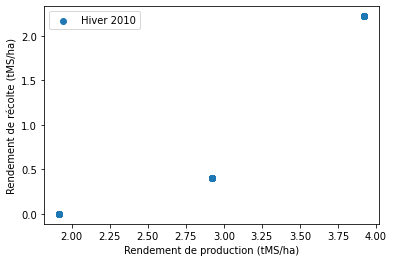

In [29]:
x = np.array(cisme_h10['Rend_production'])
y = np.array(cisme_h10['Rend_recolte'])

plt.xlabel('Rendement de production (tMS/ha)')
plt.ylabel('Rendement de récolte (tMS/ha)')
plt.scatter(x, y, label = 'Hiver 2010')
plt.legend();

On va essayer un autre modèle.

### Calcul du gisement à la main pour 2050

In [30]:
# Données départementales

dpt = pd.read_excel('Potentiels.xlsx', sheet_name = 'DPT', header = 13, index_col = 2)

In [31]:
# Cultures intermédiaires à prendre en compte pour 2050

liste_ete = ["Colza","Ble_dur", "Ble_tendre", "Triticale", "Avoine", "Seigle"]
# et orge et escourgeon
liste_hiver = ["Tournesol", "Mais_ensilage", "Mais_grain", "Betterave", "Pomme_de_terre", "Sorgho","Soja"]
# et pois et orge de printemps

# Conditions climatiques par saison (voir carte p.207 du rapport de l'ADEME)

bon_ete = ['29', '22', '56', '35', '50', '14', '27', '76', '62', '59', '80', '60', '02',
           '28', '45','78', '91', '77', '95', '92', '93', '94', '75']

mediocre_ete = ['33', '24', '40', '47', '64', '12', '46', '81', '82',
                '31', '32', '09', '65', '66', '11', '34', '30', '48', '07', '26', '13',
                '83', '84', '04', '05', '06', '2A', '2B']

bon_hiver = ['29', '22', '56', '35', '50', '14', '27', '76', '62', '80', '60',
             '28', '45', '78', '91', '77', '95', '92', '93', '94', '61', '53', '72',
             '44', '49', '85', '18', '36', '37', '41', '79', '86', '16', '17', '75']

mediocre_hiver = ['12', '46', '09', '66', '11', '34', '30', '48', '07', '26', '13', '83',
                  '84', '04', '05', '06', '2A', '2B', '15', '42', '43', '73', '74', '39', '25', '90']

In [32]:
dpt = dpt.iloc[0:96:, :]

In [33]:
# Rendements DE RÉCOLTE par département et saison en t/ha/an

dpt['Rend_MS_ete'] = .4 # été moyen
dpt['Rend_MS_hiver'] = 3. # hiver moyen

dpt.loc[bon_ete, 'Rend_MS_ete'] = 2.7
dpt.loc[mediocre_ete, 'Rend_MS_ete'] = .0

dpt.loc[bon_hiver, 'Rend_MS_hiver'] = 4.9
dpt.loc[mediocre_hiver, 'Rend_MS_hiver'] = 1.3

In [34]:
sdpt2050 = dpt.iloc[:, 66:80:].copy() # surfaces à l'échelle départementale
rdpt2050 = dpt.iloc[:, 94:108:].copy() # rendements à l'échelle départementale

In [35]:
for i, col in enumerate(rdpt2050):
    rdpt2050.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(sdpt2050):
    sdpt2050.rename(columns = {col : head_list[i]}, inplace = True)

In [36]:
s2050_ete = sdpt2050[liste_ete].sum(axis = 1) # surfaces totales de CISME d'été
s2050_hiver = sdpt2050[liste_hiver].sum(axis = 1) # surfaces totales de CISME d'hiver

In [37]:
prod2050_hiver = s2050_hiver * dpt['Rend_MS_hiver']
prod2050_ete = s2050_ete * dpt['Rend_MS_ete']

# Il y a des CIMSES d'été (resp. d'hiver) toute l'année !

print(prod2050_hiver.sum().round(0))
print(prod2050_ete.sum().round(0))

13005594.0
7973691.0


On obtient $13$ Mt de récolte totale de CISME d'hiver en France métropolitaine en 2050 et $8$ Mt en été pour un seuil de rentabilité uniforme à $4$ tMS/ha au-delà duquel on prend 100% de la production.

On obtient donc un total très proche des prévisions.

In [38]:
# Si on veut faire les mêmes calculs pour 2010...
# Mais il ne faudrait pas prendre en compte les mêmes CISME

sdpt2010 = dpt.iloc[:, 10:24:].copy() 
rdpt2010 = dpt.iloc[:, 24:38:].copy()

for i, col in enumerate(rdpt2010):
    rdpt2010.rename(columns = {col : head_list[i]}, inplace = True)
for i, col in enumerate(sdpt2010):
    sdpt2010.rename(columns = {col : head_list[i]}, inplace = True)
    
s2010_ete = sdpt2010[liste_ete].sum(axis = 1)
s2010_hiver = sdpt2010[liste_hiver].sum(axis = 1)

### Analyse de sensibilité : seuil de rentabilité

Voir p.207 et 208 du rapport de l'ADEME. Le seuil de rentabilité est estimé à un rendement de récolte de 4 tMS/ha.

In [39]:
surface_cimse_bon_ete50 = sdpt2050.loc[bon_ete, liste_ete].sum(axis = 1).sum()
surface_cimse_mediocre_ete50 = sdpt2050.loc[mediocre_ete, liste_ete].sum(axis = 1).sum()
surface_cisme_moyen_ete50 = s2050_ete.sum() - surface_cimse_mediocre_ete50 - surface_cimse_bon_ete50

surface_cimse_bon_hiver50 = sdpt2050.loc[bon_hiver, liste_hiver].sum(axis = 1).sum()
surface_cimse_mediocre_hiver50 = sdpt2050.loc[mediocre_hiver, liste_hiver].sum(axis = 1).sum()
surface_cisme_moyen_hiver50 = s2050_hiver.sum() - surface_cimse_mediocre_hiver50 - surface_cimse_bon_hiver50

In [40]:
rend_moyen_hiver = [6,5.4,5,4.7,4.4,4.1,3.8,3.4,3.1,2.8]
rend_moyen_ete = [4,3.7,3.5,3.4,3.2,3,2.9,2.7,2.6,2.4]

In [41]:
yields = {}

for y in rend_moyen_hiver:
    try:
        yields[y] += surface_cisme_moyen_hiver50/10 # on divise par 10 car cela concerne un décile (tableau p.207)
    except:
        yields[y] = surface_cisme_moyen_hiver50/10
    try:
        yields[y + 1] += surface_cimse_bon_hiver50/10
    except:
        yields[y + 1] = surface_cimse_bon_hiver50/10
    try:
        yields[y - 1] += surface_cimse_mediocre_hiver50/10
    except:
        yields[y - 1] = surface_cimse_mediocre_hiver50/10
        
for y in rend_moyen_ete:
    try:
        yields[y] += surface_cisme_moyen_ete50/10
    except:
        yields[y] = surface_cisme_moyen_ete50/10
    try:
        yields[y + 1] += surface_cimse_bon_ete50/10
    except:
        yields[y + 1] = surface_cimse_bon_ete50/10
    try:
        yields[y - 1] += surface_cimse_mediocre_ete50/10
    except:
        yields[y - 1] = surface_cimse_mediocre_ete50/10

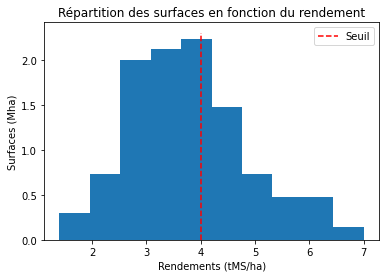

In [42]:
r = np.array(list(yields.keys()))
s = np.array(list(yields.values()))

plt.plot([4., 4.], [0., 2.3], 'r--', label = 'Seuil')

plt.hist(r, weights = s / 10**6)
plt.xlabel('Rendements (tMS/ha)')
plt.ylabel('Surfaces (Mha)')
plt.title('Répartition des surfaces en fonction du rendement')
plt.legend();

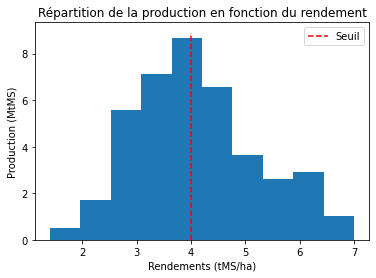

In [103]:
plt.plot([4., 4.], [0., 8.9], 'r--', label = 'Seuil')

plt.hist(r, weights = r*s / 10**6)
plt.xlabel('Rendements (tMS/ha)')
plt.ylabel('Production (MtMS)')
plt.title('Répartition de la production en fonction du rendement')
plt.legend();
#plt.savefig('seuil.png', dpi = 1200)

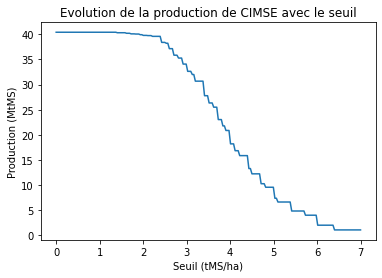

In [44]:
def threshold(seuil):
    res = 0
    for key in yields:
        if key >= seuil:
            res += key*yields[key]
    return res

threshold = np.vectorize(threshold)
t = np.linspace(0., 7., 200)
plt.plot(t, threshold(t) / 10**6)
plt.xlabel('Seuil (tMS/ha)')
plt.title('Evolution de la production de CIMSE avec le seuil')
plt.ylabel('Production (MtMS)');

## Gisement résidus et CISME

In [45]:
# p.212

# Convertir les données résidus et CIMSES en méthane

## Elevage

Masses de déjections en $t_{MS}$ et potentiel et volume de CH$_4$ en m$^3$.

In [46]:
cheptel10 = canton.loc[:, 'Vaches_laitieres_2010':'Poules_pondeuses_2010'].copy()
cheptel50 = canton.loc[:, 'Vaches_laitieres_2050':'Poules_pondeuses_2050'].copy()

In [47]:
cheptel_header = ['Vaches_laitieres', 'Vaches_allaitantes', 'Brebis', 'Porcs', 'Poulets', 'Poules']

for i, col in enumerate(cheptel10):
    cheptel10.rename(columns = {col : cheptel_header[i]}, inplace = True)
for i, col in enumerate(cheptel50):
    cheptel50.rename(columns = {col : cheptel_header[i]}, inplace = True)

In [48]:
# Fumier et déjections

liste_dej2010 = ['Fumier_2010', 'Lisier_2010', 'Fientes_2010',
                       'Dejections_Potentiel_Total_2010', 'CH4_Dej']
liste_dej2050 = ['Fumier_2050', 'Lisier_2050', 'Fientes_2050',
                       'Dejections_Potentiel_Total_2050', 'CH4_Dej 2050']

dej2010 = canton[liste_dej2010].copy()
dej2050 = canton[liste_dej2050].copy()

dej_header = ['Fumier', 'Lisier', 'Fientes', 'Total_dejections', 'CH4']

for i, col in enumerate(dej2010):
    dej2010.rename(columns = {col : dej_header[i]}, inplace = True)
for i, col in enumerate(dej2050):
    dej2050.rename(columns = {col : dej_header[i]}, inplace = True)

### Conversion des déjections en méthane

In [49]:
rows_dej10 = []
for i in dej2010.index:
    cat = [int, float]
    v = dej2010.loc[i, 'Total_dejections']
    if type(v) in cat and v > 0:
        rows_dej10.append(i)

conversion2010 = dej2010.loc[rows_dej10, 'CH4'] / dej2010.loc[rows_dej10, 'Total_dejections']
conversion2010.mean()

0.5

In [50]:
rows_dej50 = []
for i in dej2050.index:
    cat = [int, float]
    v = dej2050.loc[i, 'Total_dejections']
    if type(v) in cat and v > 0:
        rows_dej50.append(i)

conversion2050 = dej2050.loc[rows_dej50, 'CH4'] / dej2050.loc[rows_dej50, 'Total_dejections']
conversion2050.mean().round(1)

0.9

Les projections supposent une mobilisation beaucoup plus forte (et uniforme sur le territoire) des déjections pour la production de biométhane. En 2010, on a que 1 m$^3$ donne 0,5 m$^3$ de méthane et 0,9 en 2050.

### Impact de la réduction des cheptels

In [51]:
cheptels_nat10 = cheptel10.sum(axis = 0)
cheptels_nat50 = cheptel50.sum(axis = 0)
evolution_cheptels = 100 * (cheptels_nat50 - cheptels_nat10) / cheptels_nat10 # en pourcents

In [52]:
evolution_cheptels.round(1)

Vaches_laitieres     -28.9
Vaches_allaitantes   -61.5
Brebis                16.6
Porcs                -39.0
Poulets              -36.3
Poules               -21.7
dtype: float64

In [53]:
# Evolution du méthane issu des déjections

CH4_dej10 = dej2010.loc[rows_dej10, 'CH4'].sum()
CH4_dej50 = dej2050.loc[rows_dej50, 'CH4'].sum()

rapport_prod = 100 * (CH4_dej50 - CH4_dej10) / CH4_dej10 # en pourcents
rapport_prod

0.10560013839767383

Malgré la réduction des cheptels, la production de biométhane par méthanisation des déjections d'élevage reste très similaire grâce notamment à un taux de mobilisation plus fort.

### Compétition méthanisation fourrage et déjection

Quel serait l'effet d'une réduction  plus importante des cheptels si on valorisait la paille qu'ils nécessitent par méthanisation ? Indépendemment des besoins en élevage, vaut-il mieux méthaniser la paille directement ou les déjections induites par les élevages qui l'utilisent ?

Voir équations 1 et 2 du rapport de l'ADEME p.215 et 217.

In [54]:
# Données issues du tableau p.216, en % de la MS
# Incertitude sur le paturage, sur la part fumier, sur les besoins en paille

df = pd.DataFrame(data = np.array([[1.95, 1.61, 0.15, 0.076, 0.012, 0.012], [0.6, 1.1, 1.1, 1.1, 1.1, 1.1]]).T, 
                  columns = ['excretion', 'paille_dans_fumier'], 
                  index = ['Vaches_laitieres', 'Vaches_allaitantes', 'Brebis', 'Porcs', 'Poulets', 'Poules'])

df['nombre_2010'] = cheptel10.sum(axis = 0)
#df['nombre_2050'] = cheptel50.sum(axis = 0)
df['besoin_paille'] = [1.5, 1.5, 1., 1., 0., 0.] # voir p.217

df["part_fumier"] = [0.9, 0.9, 0.1, 0.9, 0, 0] # source ?

# Source Afterre 2050 : p.32 à 34

df['paturage_2010'] = [0.4, 0.6, 0, 0, 0, 0]
df['rotation_2010'] = [1, 1, 1, 2.5, 1, 6] # nombre d'animaux par place et par an

# Exploitation

df['fumier_2010'] = (df['nombre_2010']/df['rotation_2010'])*df['excretion']*(1 + df['paille_dans_fumier'])*(1 - df['paturage_2010'])*df['part_fumier']
# nombre de places = (nombre d'animaux)/(nombres d'animaux par place)

df['lisier_2010'] = (df['nombre_2010']/df['rotation_2010'])*df['excretion']*(1 - df['paturage_2010'])

df['paille_2010'] = (df['nombre_2010']/df['rotation_2010'])*df['besoin_paille']*df['part_fumier']
# (nombre de places)*(part fumier) = nombre de places fumier

# Energie

df["pouvoir_meth_fumier"] = [168, 168, 192, 192, 240, 240] #tableau 62 (inventé pour ovin), en m3/tMS
df["pouvoir_meth_lisier"] = [160, 160, 160, 232, 240, 240]
pouvoir_meth_paille = 221
PCS_CH4 = 11.04*10**(-9) # en TWh / m3

df['energie'] = (df['fumier_2010']*df['pouvoir_meth_fumier'] + df['lisier_2010']*df['pouvoir_meth_lisier'])*PCS_CH4
df['energie_perdue'] = pouvoir_meth_paille*df['paille_2010']*PCS_CH4

df

,excretion,paille_dans_fumier,nombre_2010,besoin_paille,part_fumier,paturage_2010,rotation_2010,fumier_2010,lisier_2010,paille_2010,pouvoir_meth_fumier,pouvoir_meth_lisier,energie,energie_perdue
Vaches_laitieres,1.950,0.6,3698632.0,1.5,0.9,0.4,1.0,6.231455e+06,4.327399e+06,4993153.20,168,160,19.201523,12.182495
Vaches_allaitantes,1.610,1.1,4089332.0,1.5,0.9,0.6,1.0,4.977371e+06,2.633530e+06,5520598.20,168,160,13.883497,13.469376
Brebis,0.150,1.1,5381142.0,1.0,0.1,0.0,1.0,1.695060e+05,8.071713e+05,538114.20,192,160,1.785086,1.312913
Porcs,0.076,1.1,8502746.0,1.0,0.9,0.0,2.5,4.885338e+05,2.584835e+05,3060988.56,192,232,1.697584,7.468322
Poulets,0.012,1.1,130916950.0,0.0,0.0,0.0,1.0,0.000000e+00,1.571003e+06,0.00,240,240,4.162531,0.000000
Poules,0.012,1.1,39233851.0,0.0,0.0,0.0,6.0,0.000000e+00,7.846770e+04,0.00,240,240,0.207908,0.000000


La plus grande partie du potentiel concerne les élevages bovins !

## Déchets : IAA, CSR

## Visualisation

Source départements : https://www.data.gouv.fr/fr/datasets/carte-des-departements-2-1/#_

La Corse (départements 20A et 20B) prend les lignes 6 et 7 et il n'y a donc pas de département 20.

Source région : https://public.opendatasoft.com/explore/dataset/contours-geographiques-des-nouvelles-regions-metropole/export/

In [55]:
france = gpd.read_file('departements.geojson')

In [56]:
regfr = gpd.read_file('regions.geojson')

In [85]:
def viz(col, background = france, color = None, frame = True, title = None, title_saved = None):
    fig, ax = plt.subplots(1, 1)
    if color:
        background.plot(column = col, ax = ax, legend = True, cmap = color)
    else:
        background.plot(column = col, ax = ax, legend = True)
    if not frame: # si on veut enlever le cadre
        ax.set_axis_off()
    if title:
        ax.set_title(title)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False);
    if title_saved:
        fig.savefig(title_saved + '.png', dpi = 1200)

### Consommation de gaz

Source : https://ourworldindata.org/grapher/global-primary-energy?time=earliest..latest

Projections : https://www.bp.com/en/global/corporate/energy-economics/energy-outlook/demand-by-fuel/natural-gas.html

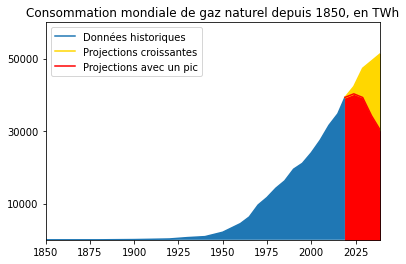

In [58]:
time = np.array([1850 + n*10 for n in range(12)] + [x for x in range(1965, 2020, 5)] + [2019])
consumption = np.array([0, 0, 0, 0, 33, 64, 142, 233, 603, 875, 2092, 4472, 6303,
                       9614, 11661, 14239, 16261, 19483, 21108, 24000, 27464, 31606, 34781, 39292])

future = np.array([x for x in range(2019, 2040, 5)])
projection_peak = np.array([39292, 40280, 39273, 34240, 30200])
projection_rise = np.array([39292, 42294, 47330, 49340, 51360])

plt.fill_between(time, consumption)
plt.fill_between(future, projection_peak, color = 'red')
plt.fill_between(future, projection_peak, projection_rise, color = 'gold')
plt.plot(time, consumption, label = 'Données historiques')
plt.plot(future, projection_rise, color = 'gold', label = 'Projections croissantes')
plt.plot(future, projection_peak, color = 'red', label = 'Projections avec un pic')
plt.xlim(1850, 2039)
plt.ylim(0, 60000)
plt.yticks(np.arange(10000, 50001, 20000))
plt.legend()
plt.title('Consommation mondiale de gaz naturel depuis 1850, en TWh');
#plt.savefig('consommation_gaz.png', dpi = 1200);

### Tension sur la ressource

#### Baisse des rendements

In [86]:
rd2010 = dpt.loc[:, 'Prod.2010.Ble.tendre':'Prod.2010.Soja'].sum(axis = 1)/dpt.loc[:, 'Surf.2010.Ble.tendre':'Surf.2010.Soja'].sum(axis = 1)
rd2050 = dpt.loc[:, 'Prod.2050.Ble.tendre':'Prod.2050.Soja'].sum(axis = 1)/dpt.loc[:, 'Surf.2050.Ble.tendre':'Surf.2050.Soja'].sum(axis = 1)


france['Evolution_rendements'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    france.loc[k, 'Evolution_rendements'] = 100*(rd2050/rd2010 - 1).loc[ind]

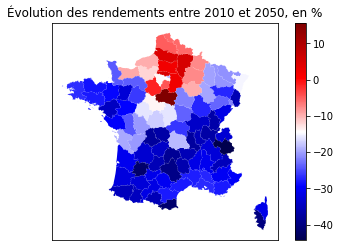

In [92]:
viz('Evolution_rendements', color = 'seismic', title = 'Évolution des rendements entre 2010 et 2050, en %')

#### Réduction des cheptels : exemple des vaches laitières

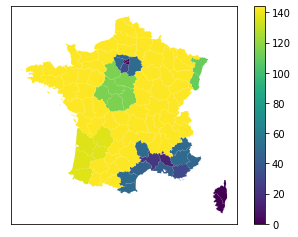

In [59]:
france['Reduction_vaches_laitieres'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    vaches10 = dpt.loc[ind, 'Vaches_laitieres_2010']
    vaches50 = dpt.loc[ind, 'Vaches_laitieres_2050']
    if vaches50 > 1:
        france.loc[k, 'Reduction_vaches_laitieres'] = 100*vaches10/vaches50
        
viz('Reduction_vaches_laitieres')

### CIMSE

In [60]:
# On fait la même hypothèse du seuil à 4 tMS/ha
# Les rendements sont ici des rendements moyen de récolte avec cette hypothèse

france['CIMSE_2050a'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    pe = s2050_ete[ind]*dpt.loc[ind, 'Rend_MS_ete']
    ph = s2050_hiver[ind]*dpt.loc[ind, 'Rend_MS_hiver']
    france.loc[k, 'CIMSE_2050a'] =  pe + ph

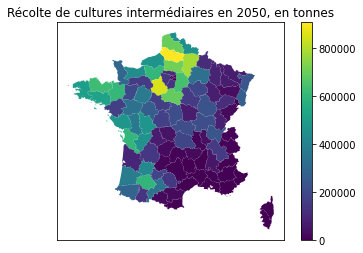

In [74]:
viz('CIMSE_2050a', title = 'Récolte de cultures intermédiaires en 2050, en tonnes')

In [62]:
# Avec les données de récolte de la base de données

france['CIMSE_2050b'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    france.loc[k, 'CIMSE_2050b'] =  dpt.loc[ind, 'CIMSES.recolte.2050']

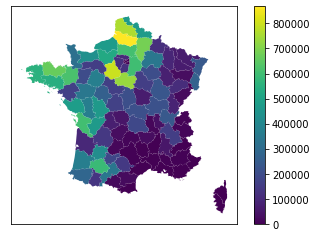

In [63]:
viz('CIMSE_2050b')

On trouve des résultats extrêmement proches !

### Déjections d'élevage

In [64]:
# Avec la base de données

france['DEJ_2050'] = 0

for k in range(96):
    ind = france.loc[k, 'code']
    france.loc[k, 'DEJ_2050'] =  dpt.loc[ind, 'Fumier_2050':'Fientes_2050'].sum()

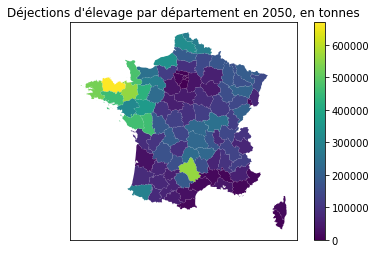

In [76]:
viz('DEJ_2050', title = "Déjections d'élevage par département en 2050, en tonnes")

### Bois-énergie

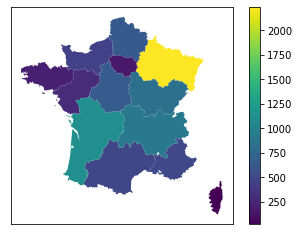

In [66]:
# Source : Agreste, Récolte de bois en 2019
# Volumes en milliers de m3 de bois rond

regfr['Recolte_bois'] = [1076, 7569, 2901, 1017, 4905, 5468, 873, 24, 1238, 1314, 10178, 307, 2025]
regfr['BE'] = [295, 2238, 490, 217, 828, 917, 500, 19, 437, 638, 1116, 166, 652]
regfr['Part_BE'] = 100*regfr['BE']/regfr['Recolte_bois'] # en pourcents

viz('BE', regfr)

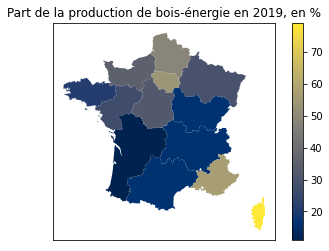

In [100]:
viz('Part_BE', regfr, title = "Part de la production de bois-énergie en 2019, en %", color = 'cividis')

### Produits connexes de scieries

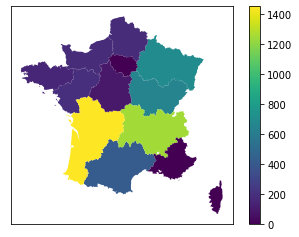

In [68]:
# Source : Agreste
# En milliers de tonnes

regfr['PCS_hors_trituration'] = [198, 695, 418, 157, 652, 1248, 0, 0, 179, 177, 1449, 0, 93]

viz('PCS_hors_trituration', regfr)